# Apple Stock

### Introduction:

We are going to use Apple's stock price.


### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv)

In [2]:
apple= pd.read_csv('https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv')
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 3. Assign it to a variable apple

### Step 4.  Check out the type of the columns

In [5]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

### Step 5. Transform the Date column as a datetime type

In [10]:
apple.Date= pd.to_datetime(apple.Date, format='%Y-%m-%d')  
apple

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
8460,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
8461,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
8462,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
8463,1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42


### Step 6.  Set the date as the index

In [12]:
apple.set_index(apple.Date, inplace=True)

In [18]:
apple.drop(columns= ['Date'])

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 7.  Is there any duplicate dates?

In [20]:
apple.index.is_unique

True

In [23]:
apple

,Date,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,,
2014-07-08,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52
...,...,...,...,...,...,...,...
1980-12-18,1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41
1980-12-17,1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-16,1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39


### Step 8.  Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [24]:
apple.sort_index(inplace=True)

### Step 9. Get the last business day of each month

In [32]:
apple.Date.resample('BME').asfreq()

Date
1980-12-31   1980-12-31
1981-01-30   1981-01-30
1981-02-27   1981-02-27
1981-03-31   1981-03-31
1981-04-30   1981-04-30
                ...    
2014-03-31   2014-03-31
2014-04-30   2014-04-30
2014-05-30   2014-05-30
2014-06-30   2014-06-30
2014-07-31          NaT
Freq: BME, Name: Date, Length: 404, dtype: datetime64[ns]

In [68]:
apple.index.to_period('M') #period does not give last day or start day of month # length=8465 , not matching the unique count or the full length

PeriodIndex(['1980-12', '1980-12', '1980-12', '1980-12', '1980-12', '1980-12',
             '1980-12', '1980-12', '1980-12', '1980-12',
             ...
             '2014-06', '2014-06', '2014-06', '2014-06', '2014-06', '2014-07',
             '2014-07', '2014-07', '2014-07', '2014-07'],
            dtype='period[M]', name='Date', length=8465)

### Step 10.  What is the difference in days between the first day and the oldest

In [35]:
print(max(apple.index)-min(apple.index))

12261 days 00:00:00


### Step 11.  How many months in the data we have?

In [56]:
len(apple.resample('ME').mean().index)

404

In [58]:
apple.index.to_period('M').unique()

PeriodIndex(['1980-12', '1981-01', '1981-02', '1981-03', '1981-04', '1981-05',
             '1981-06', '1981-07', '1981-08', '1981-09',
             ...
             '2013-10', '2013-11', '2013-12', '2014-01', '2014-02', '2014-03',
             '2014-04', '2014-05', '2014-06', '2014-07'],
            dtype='period[M]', name='Date', length=404)

In [72]:
apple.index.to_period('M')

PeriodIndex(['1980-12', '1980-12', '1980-12', '1980-12', '1980-12', '1980-12',
             '1980-12', '1980-12', '1980-12', '1980-12',
             ...
             '2014-06', '2014-06', '2014-06', '2014-06', '2014-06', '2014-07',
             '2014-07', '2014-07', '2014-07', '2014-07'],
            dtype='period[M]', name='Date', length=8465)

In [74]:
apple.to_period('M').size

59255

In [69]:
apple.groupby(apple.index.to_period('M')).size()

Date
1980-12    13
1981-01    21
1981-02    19
1981-03    22
1981-04    21
           ..
2014-03    21
2014-04    21
2014-05    21
2014-06    21
2014-07     5
Freq: M, Length: 404, dtype: int64

### Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

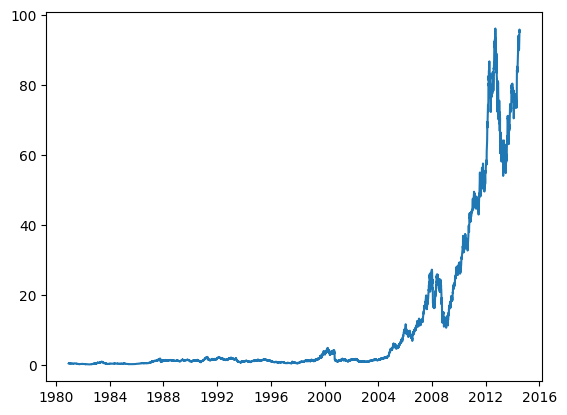

In [77]:
apple.head()

# plt.figure(figsize=(13.5,9))
plt.plot(apple['Adj Close'])

### BONUS: Create your own question and answer it.